In [1435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,KNNImputer
from sklearn.linear_model import BayesianRidge,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import folium
import re

In [1436]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1437]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [1438]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1439]:
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
720,IND,India,SIIL Jaibhim Wind Farm,WRI1026789,33.60,21.1270,74.2673,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,IND,India,KODASALI,IND0000199,120.00,14.9550,74.5904,Hydro,NaN,NaN,...,WRI,NaN,2018.0,326.30030,383.83120,202.24370,153.38920,170.0853,Central Electricity Authority,NaN
392,IND,India,K_KHEDA II,IND0000165,1340.00,21.2818,79.1160,Coal,Oil,NaN,...,WRI,NaN,2018.0,6457.09000,7513.13400,7444.94800,7062.07100,5630.6010,Central Electricity Authority,NaN
52,IND,India,BANER,IND0000028,12.00,32.1686,76.4695,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,IND,India,SUGEN CCCP,IND0000428,1147.50,21.3395,72.9889,Gas,NaN,NaN,...,WRI,NaN,2018.0,2230.00000,2519.00000,3516.44900,4654.18000,6396.1200,Central Electricity Authority,NaN
50,IND,India,BANDAKHAR TPP,IND0000026,300.00,22.3421,82.4305,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,196.76020,1290.33000,2018.7900,Central Electricity Authority,NaN
80,IND,India,BHANDARA STEEL MILL,WRI1019943,15.00,21.2320,79.6311,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,IND,India,LVS POWER DG,IND0000241,36.80,NaN,NaN,Oil,NaN,NaN,...,WRI,NaN,2018.0,0.00000,0.00000,0.00000,0.00000,0.0000,Central Electricity Authority,NaN
821,IND,India,TUTICORIN,IND0000466,1050.00,8.7635,78.1753,Coal,Oil,NaN,...,WRI,NaN,2018.0,7252.61700,7043.32900,6501.37300,5089.65500,4812.8200,Central Electricity Authority,NaN
445,IND,India,MACHKUND,IND0000243,114.75,18.5323,82.4645,Hydro,NaN,NaN,...,WRI,NaN,2018.0,570.02555,517.19105,475.08265,696.80845,465.3615,Central Electricity Authority,NaN


In [1440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [1441]:
# differenciate features columns for better under standing
feature_name=[features for features in df.columns if df[features].isnull().sum()>1]

In [1442]:
# % of missing values in given features
for i in feature_name:
    print(i,np.round(df[i].isnull().mean(),2)*100,'% missing value')

latitude 5.0 % missing value
longitude 5.0 % missing value
other_fuel1 78.0 % missing value
other_fuel2 100.0 % missing value
other_fuel3 100.0 % missing value
commissioning_year 42.0 % missing value
owner 62.0 % missing value
geolocation_source 2.0 % missing value
wepp_id 100.0 % missing value
year_of_capacity_data 43.0 % missing value
generation_gwh_2013 57.99999999999999 % missing value
generation_gwh_2014 56.00000000000001 % missing value
generation_gwh_2015 53.0 % missing value
generation_gwh_2016 52.0 % missing value
generation_gwh_2017 51.0 % missing value
generation_data_source 50.0 % missing value
estimated_generation_gwh 100.0 % missing value


#### in that most of columns have 50%  to 100% missing values and most of them are categorical datas

In [1443]:
categorical_features=[features for features in df.columns if df[features].dtypes == 'O']
categorical_features

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [1444]:
numerical_features=[features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['capacity_mw',
 'latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

In [1445]:
descreat_features=[features for features in numerical_features if len(df[features].unique())<25]
descreat_features

['other_fuel3', 'wepp_id', 'year_of_capacity_data', 'estimated_generation_gwh']

In [1446]:
for i in descreat_features:
    print('\n',df[i].value_counts())


 Series([], Name: other_fuel3, dtype: int64)

 Series([], Name: wepp_id, dtype: int64)

 2018.0    520
Name: year_of_capacity_data, dtype: int64

 Series([], Name: estimated_generation_gwh, dtype: int64)


In [1447]:
# value counts of categorical features
for i in categorical_features:
    print('\n',df[i].value_counts())


 IND    908
Name: country, dtype: int64

 India    908
Name: country_long, dtype: int64

 ZAWAR MINES                      1
Kudankulam                       1
BARAUNI                          1
BAKRESWAR                        1
UKAI LBC                         1
                                ..
Ravra - IOC Solar Power Plant    1
BARSINGAR LIGNITE                1
JOJBERA                          1
GODAVARI GT                      1
MALLARPUR                        1
Name: name, Length: 908, dtype: int64

 WRI1026211    1
WRI1019921    1
WRI1026341    1
WRI1019999    1
IND0000298    1
             ..
IND0000354    1
WRI1026185    1
WRI1019935    1
IND0000049    1
IND0000178    1
Name: gppd_idnr, Length: 908, dtype: int64

 Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

 Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

 Oil    1
Name:

In [1448]:
# drop columns that don't give any information and have null values as well
df.drop(['country','country_long','url','estimated_generation_gwh','owner','wepp_id','other_fuel2','other_fuel3','other_fuel1'],axis=1,inplace=True)

In [1449]:
for i in range(len(df.gppd_idnr)):
    df.gppd_idnr[i]=df.gppd_idnr[i][:3]

In [1450]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Count')

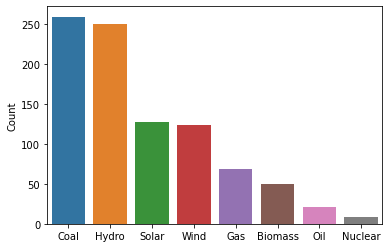

In [1451]:
sns.barplot(x=df['primary_fuel'].value_counts().index,y=df['primary_fuel'].value_counts())
plt.ylabel('Count')

#### in india most rawmaterial use for power generation are coal and water resources
#### trend of renewable solar and wind also use for power generation
#### less use of nuclear reactors bcs of high mainteanance and danagers of nuclear atoms

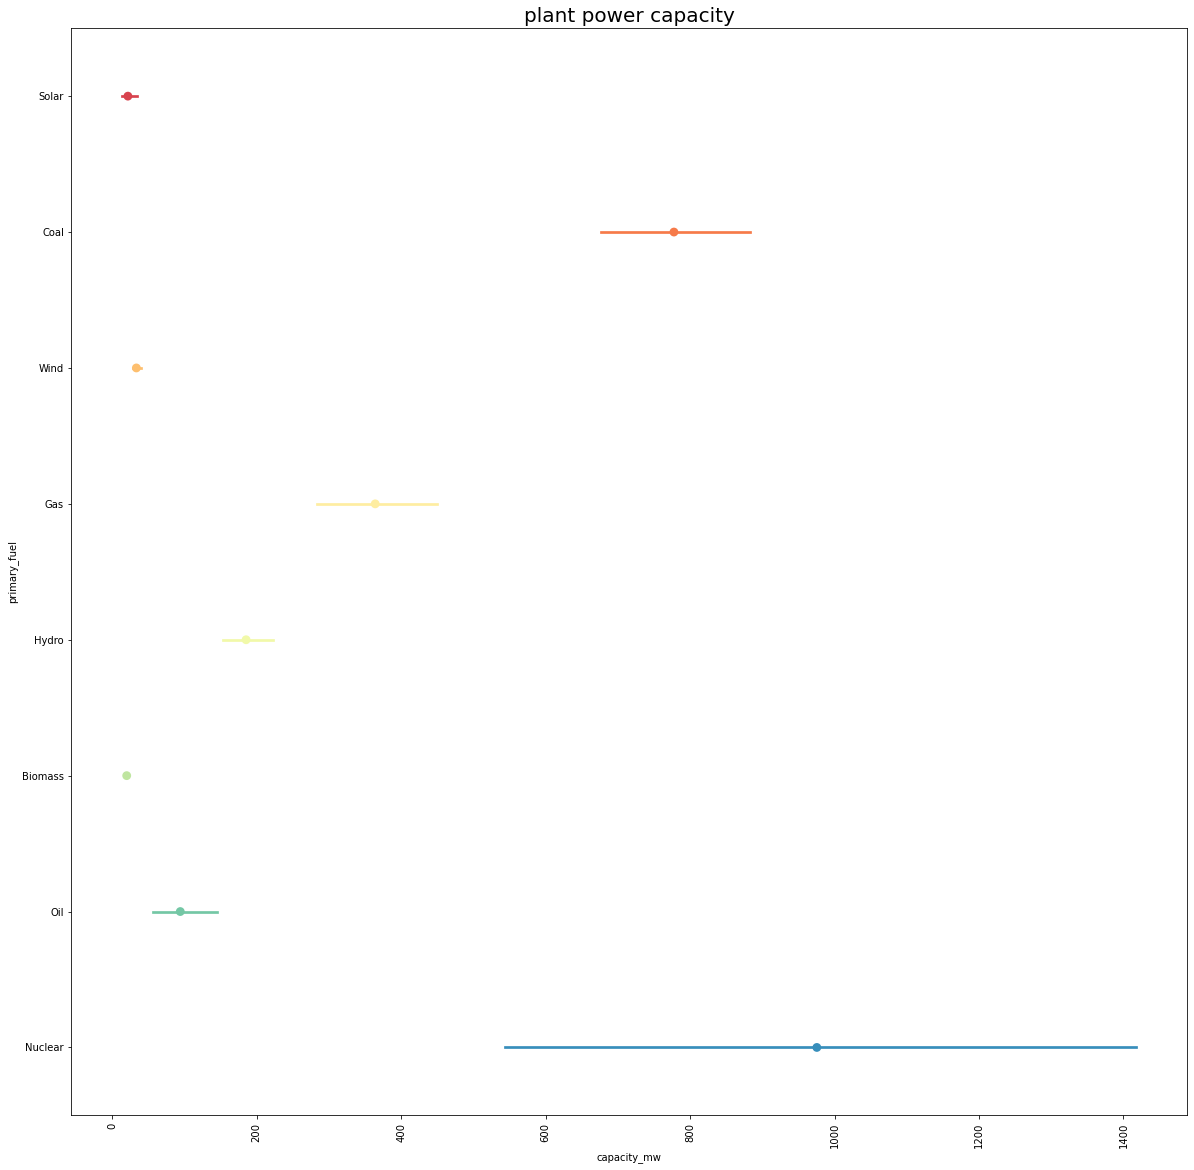

In [1452]:
plt.figure(figsize=(20,20))
ax=sns.pointplot(x='capacity_mw',y='primary_fuel',data=df,palette='Spectral',join=False)
plt.title('plant power capacity',fontsize=20)
plt.xticks(rotation=90)
plt.show()

#### as compare to power capacity nuclear and coal plant have high capacity
#### also gas turbine have high efficient of power generation


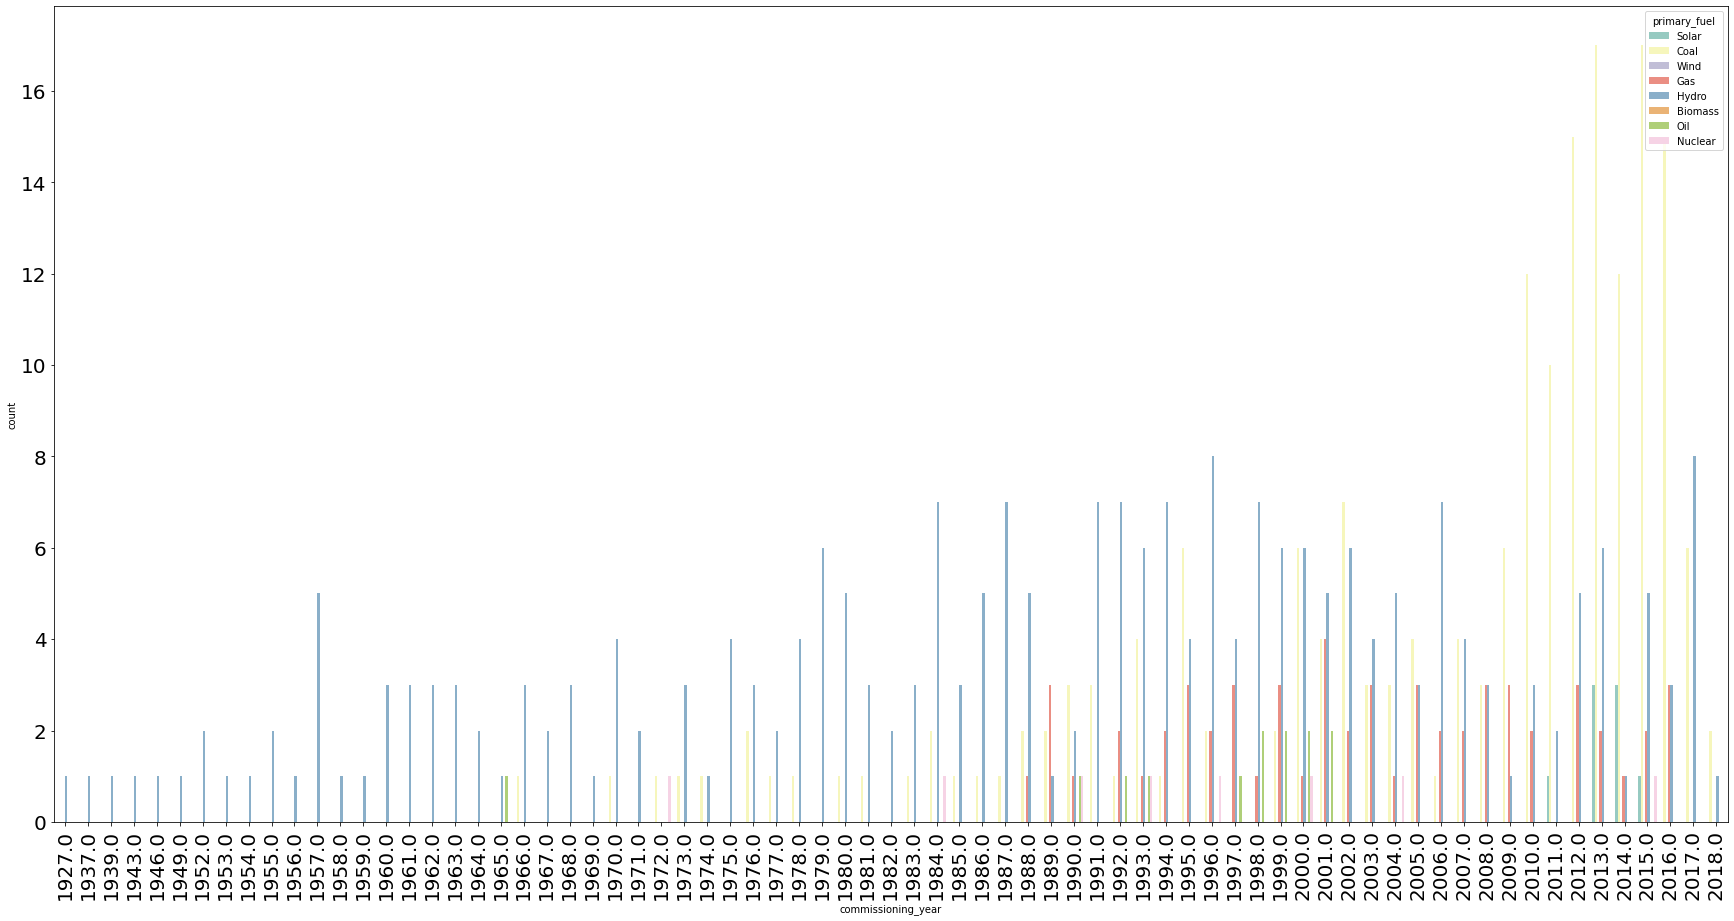

In [1453]:
plt.figure(figsize=(30,15))
sns.countplot(x=df['commissioning_year'],palette='Set3',hue=df['primary_fuel'])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### as compare with years of comissioning last 8 to 10 years power generation increase with demand
#### also use of raw material as coal in most of power plant from lasy few years
#### we also seen that use of water resources in power generaation was start from the year 1927  to as now
#### first oil and coal base power plant generate in b/t 1965 & 1966
#### 1st nuclear power platn start at 1972
#### due to high demand of eletricity coal power plant were comissioning more ddue to high efficiency
#### solar power plant used from 2011 as renewable energy resources but power generation capacity is less as comaper to others
#### in India most raw components used for power generation is coal and water resources

<AxesSubplot:xlabel='primary_fuel'>

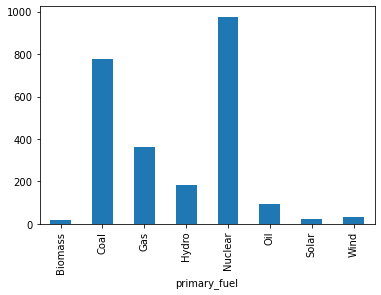

In [1454]:
# comapare with fuel with capacity of power generation nuclear have high efficiency 
df.groupby(['primary_fuel'])['capacity_mw'].mean().plot(kind='bar')

<AxesSubplot:xlabel='primary_fuel'>

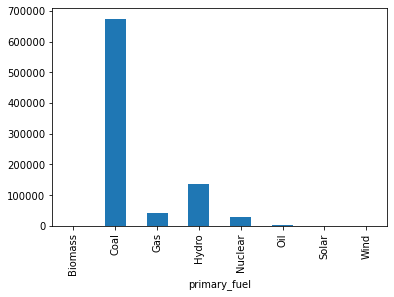

In [1455]:
df.groupby(['primary_fuel'])['generation_gwh_2013'].sum().plot(kind='bar')

<AxesSubplot:xlabel='primary_fuel'>

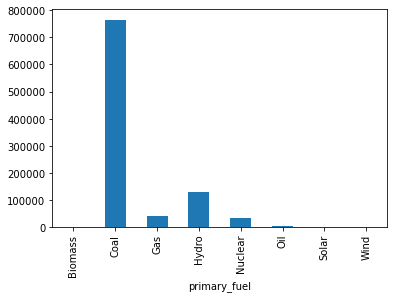

In [1456]:
df.groupby(['primary_fuel'])['generation_gwh_2014'].sum().plot(kind='bar')

<AxesSubplot:xlabel='primary_fuel'>

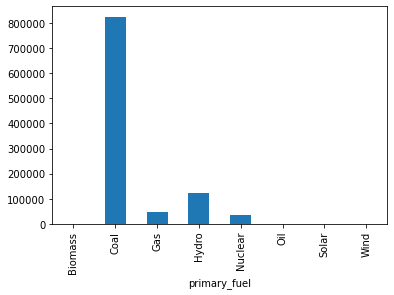

In [1457]:
df.groupby(['primary_fuel'])['generation_gwh_2015'].sum().plot(kind='bar')

<AxesSubplot:xlabel='primary_fuel'>

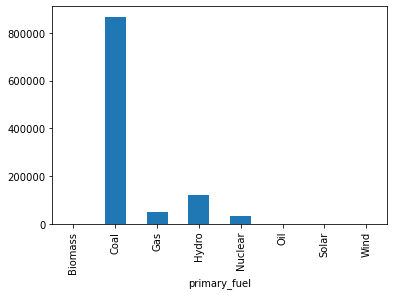

In [1458]:
df.groupby(['primary_fuel'])['generation_gwh_2016'].sum().plot(kind='bar')

<AxesSubplot:xlabel='primary_fuel'>

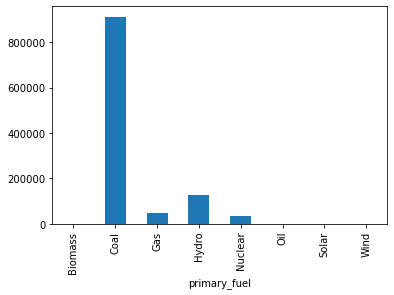

In [1459]:
df.groupby(['primary_fuel'])['generation_gwh_2017'].sum().plot(kind='bar')

<AxesSubplot:xlabel='geolocation_source'>

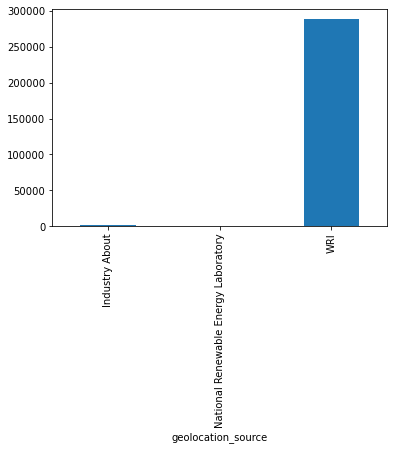

In [1460]:
df.groupby(['geolocation_source'])['capacity_mw'].sum().plot(kind='bar')

In [1461]:
#impute missing values with iterative imputers
lr=LinearRegression()
imp=IterativeImputer(estimator=lr,max_iter=100,random_state=0)
for i in df.iloc[:,9:15]:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    

In [1462]:

imp1=SimpleImputer(strategy='most_frequent')
df['latitude']=df['latitude'].fillna(df['latitude'].median())
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['geolocation_source']=imp1.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [1463]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [1464]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
1,ADITYA CEMENT WORKS,WRI,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
2,AES Saurashtra Windfarms,WRI,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
3,AGARTALA GT,IND,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
905,Yelisirur wind power project,WRI,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
906,ZAWAR MINES,WRI,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN


In [1465]:
plant_location=df[['latitude','longitude','name']]
map = folium.Map(location=[plant_location.latitude.mean(), plant_location.longitude.mean()], zoom_start=5, control_scale=True)
for index, location_info in plant_location.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["name"]).add_to(map)

In [1466]:
map

In [1467]:
df.drop(['commissioning_year','year_of_capacity_data','generation_data_source','name'],axis=1,inplace=True)

In [1468]:
# convert categorical in to numerical columns
l1=['gppd_idnr','primary_fuel','geolocation_source','source']
for i in l1:
    df[i]=lb.fit_transform(df[i])

In [1469]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1,2.5,28.1839,73.2407,6,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,98.0,24.7663,74.6090,1,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,1,39.2,21.9038,69.3732,7,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,0,135.0,23.8712,91.3602,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,0,1800.0,21.9603,82.4091,1,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,1600.0,16.2949,77.3568,1,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,1,3.0,12.8932,78.1654,6,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,1,25.5,15.2758,75.5811,7,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,1,80.0,24.3500,73.7477,1,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


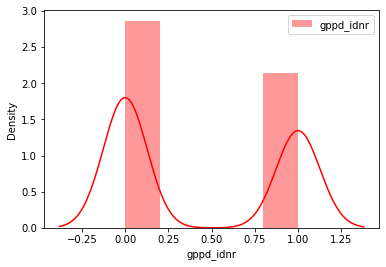

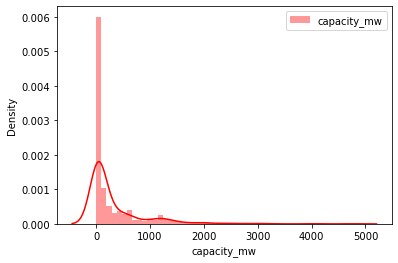

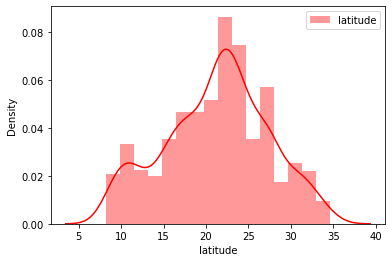

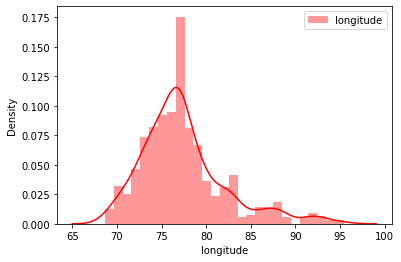

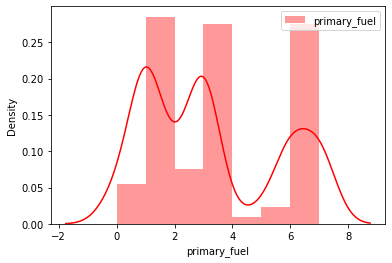

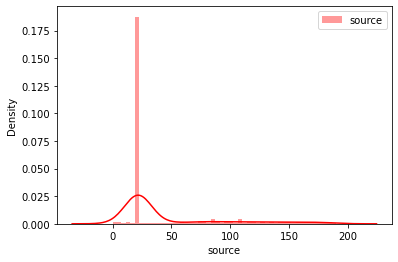

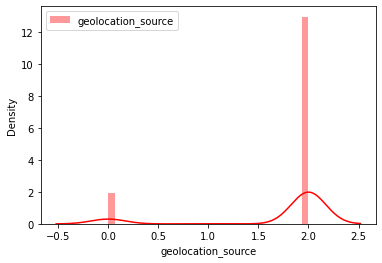

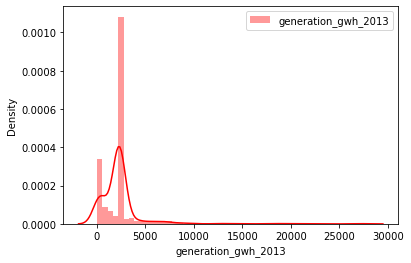

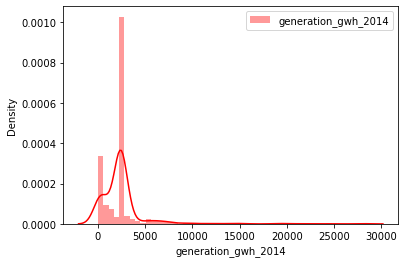

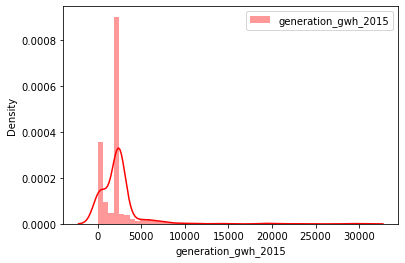

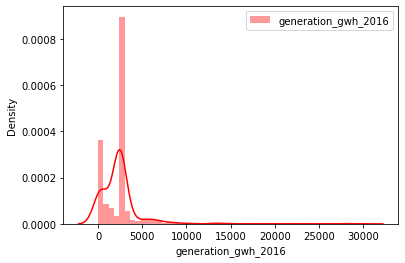

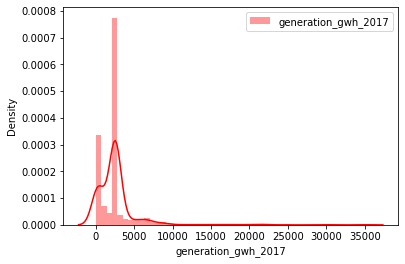

In [1470]:
for i in df.columns:
    plt.plot()
    sns.distplot(df[i],label=i,color='r')
    plt.legend()
    plt.show()

### from the distribution plot generation_gwh,longitude,capacity_mw have positive skewness

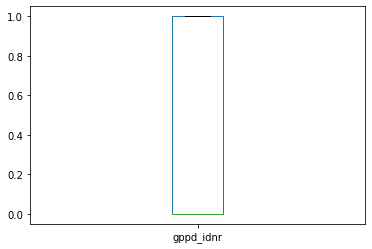

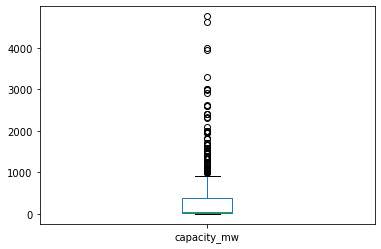

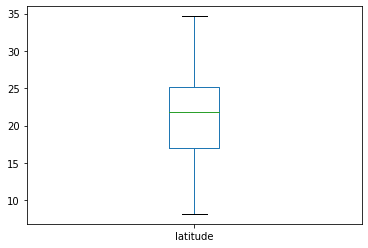

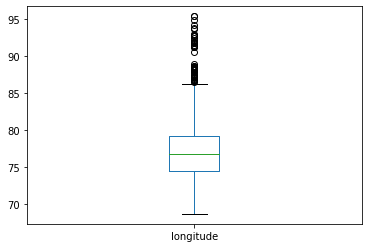

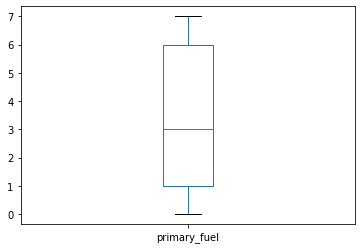

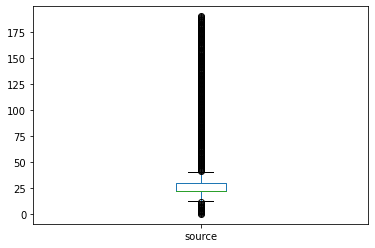

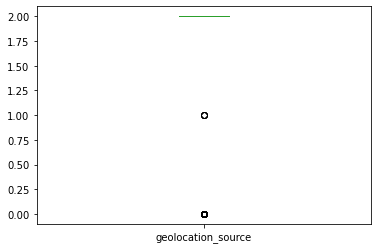

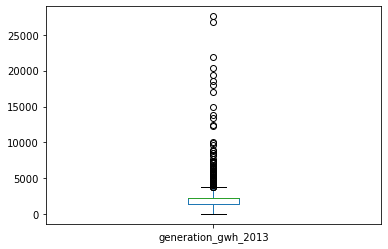

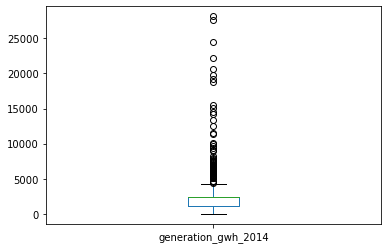

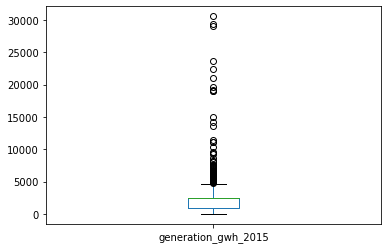

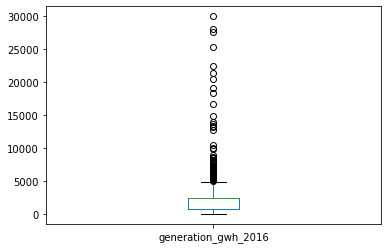

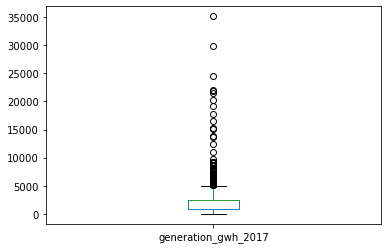

In [1471]:
# show outliers in datas
for i in df.columns:
    df[i].plot(kind='box')
    plt.show()

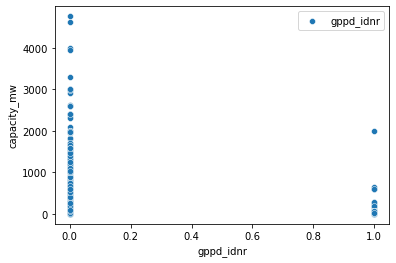

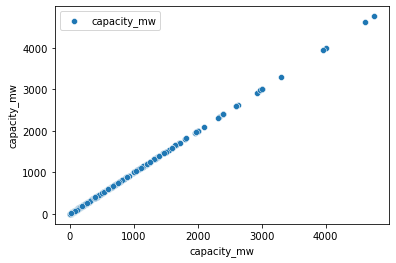

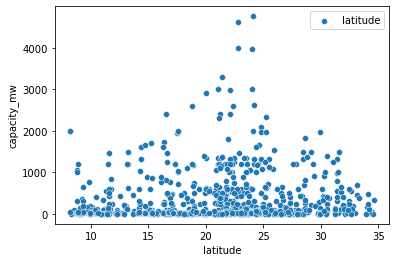

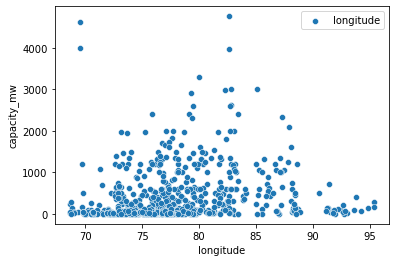

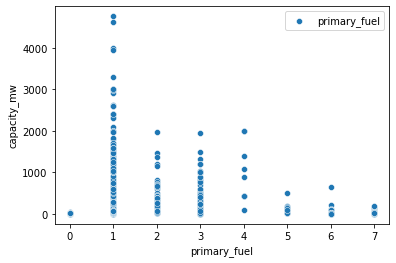

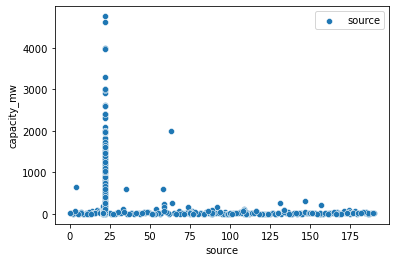

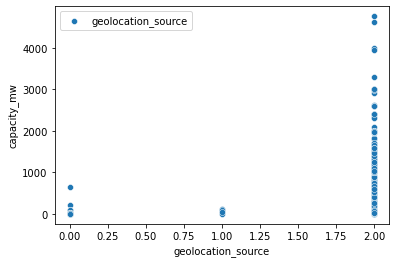

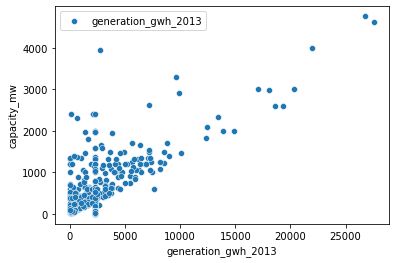

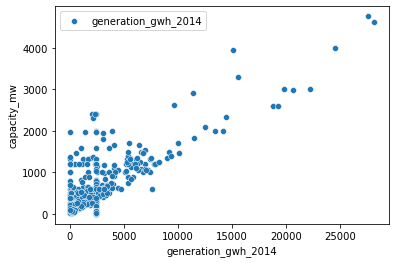

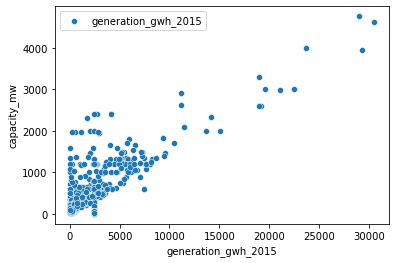

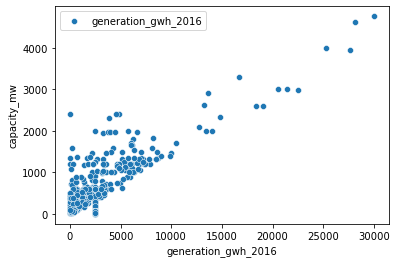

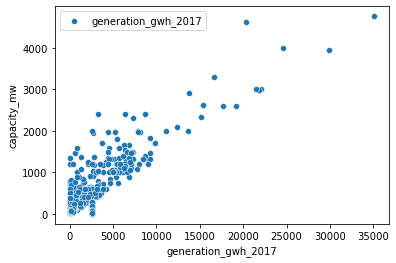

In [1491]:
for i in df.columns:
    plt.plot()
    sns.scatterplot(df[i],df['capacity_mw'],label=i,data=df)
    plt.legend()
    plt.show()

#### from scatter plot generation_gwh from 2013 to 2017 continously increasing bt demand have highly co linear 

In [1472]:
df.describe()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,0.427313,321.046378,21.225679,77.410936,3.205947,43.823789,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,0.494961,580.221767,6.089450,4.783873,2.281339,44.624092,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.837500,17.057825,74.390250,1.000000,22.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,0.000000,60.000000,21.778300,76.719250,3.000000,22.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,1.000000,388.125000,25.183775,79.211600,6.000000,29.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,1.000000,4760.000000,34.649000,95.408000,7.000000,190.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [1473]:
df.corr()['capacity_mw']

gppd_idnr             -0.416879
capacity_mw            1.000000
latitude               0.047608
longitude              0.200473
primary_fuel          -0.377783
source                -0.241701
geolocation_source     0.204698
generation_gwh_2013    0.667842
generation_gwh_2014    0.705434
generation_gwh_2015    0.722081
generation_gwh_2016    0.752829
generation_gwh_2017    0.767040
Name: capacity_mw, dtype: float64

<AxesSubplot:>

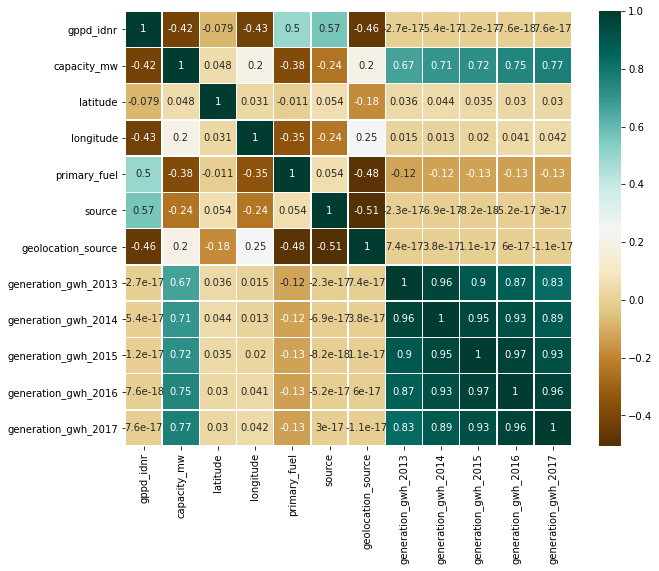

In [1474]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',linewidth=0.5)

##### capacity_mw naegative co relates with fuels and source 
##### primary fuels and geolocation_source are negative correlated
##### capacity_mw high correlated with generation_gwh years

In [1475]:
#remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 144, 144, 159,
       159, 180, 184, 192, 210, 210, 210, 210, 210, 210, 240, 245, 300,
       309, 309, 309, 309, 309, 309, 322, 324, 334, 341, 346, 361, 364,
       365, 365, 365, 365, 365, 365, 376, 389, 417, 428, 483, 494, 494,
       494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520, 530,
       533, 547, 639, 649, 649, 649, 649, 649, 649, 658, 658, 658, 658,
       658, 658, 662, 670, 690, 696, 696, 696, 696, 696, 722, 722, 722,
       722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727, 727, 787,
       787, 787, 787, 787, 787, 789, 809, 809, 809, 809, 809, 819, 833,
       848, 849, 871, 872, 880, 881, 881, 881, 881, 881, 881, 896, 901],
      dtype=int64), array([ 1,  9, 10, 11,  5,  5,  1,  7,  8,  9, 10, 11,  7,  8,  3,  3,  5,
        1,  7,  8,  9, 10, 11,  3,  3,  5,  1,  7,  8,  9, 10, 11,  5,  3,
        3,  3,  5,  3,  1,  1,  7,  8,  9, 10, 11,  1,  3,  3,  3,  1,  1,
        7,  8,  9, 10, 11,  1,  7

In [1476]:
df_n=df[(z<3).all(axis=1)]
df_n.shape

(852, 12)

In [1477]:
print('Data loss after outliers remove',((908-825)/908)*100)

Data loss after outliers remove 9.140969162995596


In [1478]:
# checking skewness
df_n.skew()

gppd_idnr              0.256034
capacity_mw            1.991090
latitude              -0.119696
longitude              0.881244
primary_fuel           0.423749
source                 1.818830
geolocation_source    -2.140211
generation_gwh_2013    1.526791
generation_gwh_2014    1.440501
generation_gwh_2015    1.328881
generation_gwh_2016    1.353852
generation_gwh_2017    1.250824
dtype: float64

In [1479]:
# remove skewness from target column
df_n['capacity_mw']=np.cbrt(df['capacity_mw'])
df_n.skew()

gppd_idnr              0.256034
capacity_mw            0.824171
latitude              -0.119696
longitude              0.881244
primary_fuel           0.423749
source                 1.818830
geolocation_source    -2.140211
generation_gwh_2013    1.526791
generation_gwh_2014    1.440501
generation_gwh_2015    1.328881
generation_gwh_2016    1.353852
generation_gwh_2017    1.250824
dtype: float64

In [1480]:
x=df_n.drop(columns=['capacity_mw'])
y=df_n['capacity_mw']

In [1481]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1482]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,4.137282,gppd_idnr
1,12.968997,latitude
2,44.290656,longitude
3,5.460464,primary_fuel
4,4.168145,source
5,13.644683,geolocation_source
6,24.529711,generation_gwh_2013
7,33.783611,generation_gwh_2014
8,28.102232,generation_gwh_2015
9,32.324551,generation_gwh_2016


In [1483]:
from sklearn.preprocessing import power_transform,StandardScaler

In [1484]:
# remove skewness
x1=power_transform(x,method='yeo-johnson')
x1=pd.DataFrame(x1)

In [1485]:
x1.skew()

0     0.256034
1    -0.076198
2    -0.002138
3    -0.056404
4    -0.192768
5    -2.111830
6    -0.189442
7    -0.266801
8    -0.327678
9    -0.326240
10   -0.353378
dtype: float64

In [1486]:
# scaling dataset
sc=StandardScaler()
x2=sc.fit_transform(x1)

#### linear regression problem

In [1487]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [1488]:
for i in range(1,2000):
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At Random state',i,'score is well')
        print('Train score',r2_score(y_train,pred_train)*100)
        print('Test Score',r2_score(y_test,pred_test)*100)

At Random state 272 score is well
Train score 55.34508023467022
Test Score 55.354583061160035


In [1489]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=272)
lr.fit(x_train,y_train)
print('Intercept:',lr.intercept_)
print('\nTrain score:',lr.score(x_train,y_train)*100)
pred_lr=lr.predict(x_test)
print('R2_score: ',r2_score(y_test,pred_lr)*100)
print('\nError1: ',mean_absolute_error(y_test,pred_lr))
print('Error2 RMSE: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

Intercept: 4.8513519337885

Train score: 55.34508023467022
R2_score:  55.354583061160035

Error1:  1.464770248209379
Error2 RMSE:  1.9951081068051488


In [1492]:
from sklearn.linear_model import Lasso,Ridge,RidgeCV,BayesianRidge,SGDRegressor,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

In [1493]:
# hypertuning parameters
pr={'alpha':[0.1,0.01,0.001,0.0001,1],'fit_intercept':[True,False],'normalize':[True,False],'precompute':['auto',True,False]}
grid = GridSearchCV(Lasso(), pr,scoring="r2")
grid.fit(x2,y)
print(grid.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'normalize': True, 'precompute': False}


In [1494]:
# hyper tuning parameters
pr={'alpha':[0.1,0.01,0.001,0.0001,1],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}
grid = GridSearchCV(Ridge(), pr,scoring="r2")
grid.fit(x2,y)
print(grid.best_params_)

{'alpha': 1, 'solver': 'saga'}


In [1504]:
nsvr=NuSVR()
l2=Ridge(alpha=1,solver='saga')
rc=RidgeCV()
br=BayesianRidge()
l1=Lasso(alpha=0.001,fit_intercept=True,normalize=True,precompute=False)
l3=ElasticNet()
sgd=SGDRegressor()
svr=SVR()
svrl=LinearSVR()
svrp=SVR(kernel='poly')
kn=KNeighborsRegressor()
dtc=DecisionTreeRegressor() 
xg1=XGBRFRegressor()
xg2=XGBRegressor()

#### Regularization

In [1496]:
def regul(f):
    f.fit(x_train,y_train)
    print(f,'\n\t',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('R2_score :',r2_score(y_test,pred)*100)
    print('error1:\n:',mean_absolute_error(y_test,pred))
    print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred)))

In [1497]:
regul(l1)

Lasso(alpha=0.001, normalize=True) 
	 55.15213722353698
R2_score : 55.677772930798874
error1:
: 1.4646759616002716
RSME:
: 1.9878736587161283


In [1498]:
regul(l2)

Ridge(alpha=1, solver='saga') 
	 55.34467869766504
R2_score : 55.364103253139795
error1:
: 1.4652273253744736
RSME:
: 1.9948953769644617


In [1499]:
regul(l3)

ElasticNet() 
	 35.11041260682993
R2_score : 37.05935325418238
error1:
: 1.9352543965281575
RSME:
: 2.3688828966061353


In [1500]:
regul(rc)

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 
	 55.31752394868261
R2_score : 55.44779525201364
error1:
: 1.4690677025329233
RSME:
: 1.9930242919412493


In [1502]:
regul(br)

BayesianRidge() 
	 55.3171833895291
R2_score : 55.44812440582641
error1:
: 1.4691010995492721
RSME:
: 1.9930169296484064


### other regressors

In [1505]:
def reg(f):
    f.fit(x_train,y_train)
    print(f,'\n\t',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('R2_score :',r2_score(y_test,pred)*100)
    print('error1:\n:',mean_absolute_error(y_test,pred))
    print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred)))

In [1506]:
reg(nsvr)

NuSVR() 
	 70.74469913227107
R2_score : 74.59515290901815
error1:
: 1.114121534665164
RSME:
: 1.5049992530387097


In [1507]:
reg(svr)

SVR() 
	 70.84499559235428
R2_score : 74.21407241216605
error1:
: 1.092332821596405
RSME:
: 1.5162449628932397


In [1508]:
reg(svrl)

LinearSVR() 
	 51.26887239812001
R2_score : 51.73414918169914
error1:
: 1.3490318581345426
RSME:
: 2.0744261327399207


In [1509]:
reg(svrp)

SVR(kernel='poly') 
	 64.26748595341742
R2_score : 64.02883598382752
error1:
: 1.3320176694020207
RSME:
: 1.79083361430659


In [1510]:
reg(dtc)

DecisionTreeRegressor() 
	 99.87484991228355
R2_score : 75.49508070010175
error1:
: 1.0544077292176621
RSME:
: 1.4781027672010618


In [1511]:
reg(kn)

KNeighborsRegressor() 
	 80.01840663529592
R2_score : 79.10328438241717
error1:
: 0.9106851116532793
RSME:
: 1.3649508332124627


In [1512]:
reg(sgd)

SGDRegressor() 
	 55.29625262448099
R2_score : 55.52787060501308
error1:
: 1.4611574051054654
RSME:
: 1.9912324176741463


In [1513]:
reg(xg1)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) 
	 91.44177040856798
R2_score : 89.24325015703796
error1:
: 0.7406352075181981
RSME:
: 0.9793062499128401


In [1514]:
reg(xg2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 
	 99.76415233407975
R2_score : 87.54665936427725
error1:
: 0.7952843377615166
RSME:
: 1.0537095726000432


#### hypertuning parameter for improve score

In [1515]:
pr={'n_neighbors':range(1,10),'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'metric':['str','callable','minkowski'],'p':[1,2]}
grid = GridSearchCV(KNeighborsRegressor(), pr)
grid.fit(x2,y)
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
0.7421661631175851


In [1531]:
 param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]}
gsearch = GridSearchCV(estimator = xg1,param_grid = param_tuning,scoring = 'r2',cv = 5,verbose = 1)
gsearch.fit(x2,y)
print(gsearch.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}


In [1543]:
parameters={'n_estimators': [2000,1000,500,100],  
              'max_depth': [7, 8,9,10],
              'reg_lambda' :[0.26, 0.25, 0.2],
           'learning_rate':[0.001,0.01,0.1,1]}
clf = GridSearchCV(XGBRFRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x2,y)
clf.best_params_

{'learning_rate': 1, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.2}

In [1519]:
knn=KNeighborsRegressor(algorithm='brute',n_neighbors=4,weights='distance',metric='minkowski')
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('SCore:',knn.score(x_train,y_train))
print('R2_score :',r2_score(y_test,pred_knn)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_knn))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_knn)))

SCore: 0.998726178822815
R2_score : 80.76517306140896
error1:
: 0.9159651038396692
RSME:
: 1.3095501460418268


In [1530]:
xg=XGBRegressor(colsample_bytree=0.7,learning_rate=0.1,max_depth=10,min_child_weight=1,n_estimators=500,objective='reg:squarederror',subsample=0.7)
xg.fit(x_train,y_train)
pred_xg=xg.predict(x_test)
print('SCore:',xg.score(x_train,y_train)*100)
print('R2_score :',r2_score(y_test,pred_xg)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_xg))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_xg)))

SCore: 99.87455673013709
R2_score : 88.21752170553417
error1:
: 0.7694597394904551
RSME:
: 1.0249349812071094


In [1549]:
xgr=XGBRFRegressor(learning_rate=1,max_depth=8,n_estimators=1000,reg_lambda=0.2)
xgr.fit(x_train,y_train)
pred_xgr=xgr.predict(x_test)
print('SCore:',xgr.score(x_train,y_train)*100)
print('R2_score :',r2_score(y_test,pred_xgr)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_xgr))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_xgr)))

SCore: 91.73689859306684
R2_score : 89.21152541491402
error1:
: 0.7237134335146989
RSME:
: 0.980749314273473


### Ensemble method

In [1550]:
ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]

In [1551]:
for i in ensemble:
    i.fit(x_train,y_train)
    print('\n \nscore: ',i,':\n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' R2 score:',r2_score(y_test,pred)*100)
    print('error1:\n',mean_absolute_error(y_test,pred))
    print('RSME:\n',np.sqrt(mean_squared_error(y_test,pred)))


 
score:  RandomForestRegressor() :
 97.1192254081845
 R2 score: 89.43963816428777
error1:
 0.7331357499441518
RSME:
 0.9703253804340413

 
score:  AdaBoostRegressor() :
 80.79775589837332
 R2 score: 82.6205834715947
error1:
 1.0267497845115927
RSME:
 1.2447885581877873

 
score:  GradientBoostingRegressor() :
 92.58312227899424
 R2 score: 88.78165386328666
error1:
 0.7573990149888787
RSME:
 1.0000976566051916

 
score:  BaggingRegressor() :
 96.267315543763
 R2 score: 88.0945638263503
error1:
 0.8040458760694206
RSME:
 1.030269035197163


In [1553]:
parameters={'n_estimators': [500,100,70,50,45],  
              'criterion': ['squared_error','mse','absolute_error','poisson'],
              'max_features' :['auto','sqrt','log2'],
            'max_depth': [7, 8,9,10]}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x2,y)
clf.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}

In [1554]:
rfr=RandomForestRegressor(criterion='mse',max_depth=10,max_features='log2',n_estimators=500)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('SCore:',rfr.score(x_train,y_train)*100)
print('R2_score :',r2_score(y_test,pred_rfr)*100)
print('error1:\n:',mean_absolute_error(y_test,pred_rfr))
print('RSME:\n:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

SCore: 95.46532832249052
R2_score : 89.6053968866005
error1:
: 0.7123362275068346
RSME:
: 0.9626799962827712


#### check cross validation of select models base on r2 score and RMSE 

In [1555]:
from sklearn.model_selection import cross_val_score

In [1560]:
for i in range(2,20):
    score=cross_val_score(knn,x2,y,cv=i,scoring='r2')
    print('CV=',i,'\n',score.mean())

CV= 2 
 0.7193754159208181
CV= 3 
 0.7392539744787489
CV= 4 
 0.7463563722229734
CV= 5 
 0.7421661631175851
CV= 6 
 0.7535535109878229
CV= 7 
 0.7437590332865731
CV= 8 
 0.7484308448003972
CV= 9 
 0.7382052323738854
CV= 10 
 0.7464017824478207
CV= 11 
 0.7464579727580457
CV= 12 
 0.7497356847274829
CV= 13 
 0.7567278707175474
CV= 14 
 0.7426476219590082
CV= 15 
 0.7574067840717379
CV= 16 
 0.7478461995323571
CV= 17 
 0.7448667718019866
CV= 18 
 0.7437508536619457
CV= 19 
 0.745425088178333


In [1561]:
for i in range(2,15):
    score=cross_val_score(xg,x2,y,cv=i,scoring='r2')
    print(' CV=',i,'\n',score.mean())

 CV= 2 
 0.8195140958475366
 CV= 3 
 0.8262114603933431
 CV= 4 
 0.8348938458542631
 CV= 5 
 0.82978077378499
 CV= 6 
 0.8370626252489832
 CV= 7 
 0.8335682016974879
 CV= 8 
 0.835991461495867
 CV= 9 
 0.8398473216619342
 CV= 10 
 0.8357242748042382
 CV= 11 
 0.8462068187604479
 CV= 12 
 0.840133721512597
 CV= 13 
 0.833875546634231
 CV= 14 
 0.8280423611580764


In [1562]:
for i in range(2,15):
    score=cross_val_score(xgr,x2,y,cv=i,scoring='r2')
    print('CV=',i,'\n',score.mean())

CV= 2 
 0.82211547143789
CV= 3 
 0.8310636660839421
CV= 4 
 0.8347994829407193
CV= 5 
 0.8306496682391533
CV= 6 
 0.8326461824705204
CV= 7 
 0.8271376078794518
CV= 8 
 0.8341528695537958
CV= 9 
 0.829590438812865
CV= 10 
 0.8300337691870434
CV= 11 
 0.8323155073341535
CV= 12 
 0.8320263461922656
CV= 13 
 0.8372626285334926
CV= 14 
 0.8308640684650704


In [1563]:
for i in range(2,15):
    score=cross_val_score(rfr,x2,y,cv=i,scoring='r2')
    print('CV=',i,'\n',score.mean())

CV= 2 
 0.8419748509118246
CV= 3 
 0.8462390736580225
CV= 4 
 0.8498686169630264
CV= 5 
 0.8497373404060482
CV= 6 
 0.8511134301224198
CV= 7 
 0.846106540811939
CV= 8 
 0.8512391545765942
CV= 9 
 0.8470220161959747
CV= 10 
 0.8495899334024116
CV= 11 
 0.8511065734086606
CV= 12 
 0.8504984794869364
CV= 13 
 0.854094956752872
CV= 14 
 0.8479640851632203


In [1565]:
score2=cross_val_score(rfr,x2,y,cv=13)
print(score2.mean())

0.8544324372160983


#### saving model base on less RMSE and r2 score and cv score  select RANDOMFOREST REGRESSOR

In [1566]:
import joblib
joblib.dump(rfr,'powerplant.obj')
powerplant  = joblib.load('powerplant.obj')

In [1567]:
result=pd.DataFrame({'Actual':y_test,'Predict':pred_rfr})

In [1568]:
result

,Actual,Predict
518,2.663712,3.106868
120,2.466212,2.355123
743,7.937005,8.378557
399,1.259921,1.591185
626,10.000000,10.025219
...,...,...
545,10.626586,10.867095
311,10.322801,10.945326
447,3.914868,3.539505
899,3.476027,2.851771


In [1572]:
y_pred=rfr.predict(x2)
data=x
data['capacity_mw_pred']=y_pred
data['capacity_mw']=y
data['differnce']=data['capacity_mw']-data['capacity_mw']
data

,gppd_idnr,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,capacity_mw_pred,capacity_mw,differnce
0,1,28.1839,73.2407,6,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,2.649294,1.357209,0.0
1,1,24.7663,74.6090,1,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,4.234844,4.610436,0.0
2,1,21.9038,69.3732,7,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,3.310834,3.396999,0.0
3,0,23.8712,91.3602,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,5.827774,5.129928,0.0
4,0,21.9603,82.4091,1,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,11.570106,12.164404,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,16.2949,77.3568,1,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,9.568105,11.696071,0.0
904,1,12.8932,78.1654,6,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,2.334514,1.442250,0.0
905,1,15.2758,75.5811,7,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,3.021927,2.943383,0.0
906,1,24.3500,73.7477,1,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,4.262337,4.308869,0.0


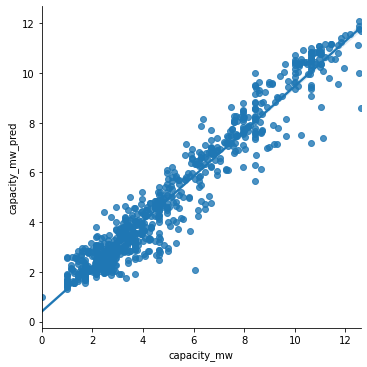

In [1581]:
sns.lmplot(x='capacity_mw',y='capacity_mw_pred',data=data,)

#### Classification problem of primary fuels

In [1595]:
df_n.skew()

gppd_idnr              0.256034
capacity_mw            0.824171
latitude              -0.119696
longitude              0.881244
primary_fuel           0.423749
source                 1.818830
geolocation_source    -2.140211
generation_gwh_2013    1.526791
generation_gwh_2014    1.440501
generation_gwh_2015    1.328881
generation_gwh_2016    1.353852
generation_gwh_2017    1.250824
dtype: float64

In [1596]:
x=df_n.drop(columns='primary_fuel')
y=df_n['primary_fuel']

In [1598]:
# remove skewness
x3=power_transform(x,method='yeo-johnson')
x4=pd.DataFrame(x3)

In [1599]:
x4.skew()

0     0.256034
1     0.019626
2    -0.076198
3    -0.002138
4    -0.192768
5    -2.111830
6    -0.189442
7    -0.266801
8    -0.327678
9    -0.326240
10   -0.353378
dtype: float64

In [1600]:
# use scaler
sc=StandardScaler()
sc.fit_transform(x4)

array([[ 1.13592367, -1.63241182,  1.14823798, ...,  0.38040456,
         0.38382279,  0.38172348],
       [ 1.13592367,  0.19659903,  0.58507393, ...,  0.38040456,
         0.38382279,  0.38172348],
       [ 1.13592367, -0.2954523 ,  0.11735896, ...,  0.38040456,
         0.38382279,  0.38172348],
       ...,
       [ 1.13592367, -0.52071311, -0.94904559, ...,  0.38040456,
         0.38382279,  0.38172348],
       [ 1.13592367,  0.08649863,  0.51681727, ...,  0.38040456,
         0.38382279,  0.38172348],
       [ 1.13592367, -0.74386342, -1.78675435, ...,  0.38040456,
         0.38382279,  0.38172348]])

In [1601]:
# balancing datasets
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x5,y5=sm.fit_resample(x4,y)

In [1602]:
np.bincount(y)

array([ 45, 233,  64, 236,   9,  21, 121, 123], dtype=int64)

In [1603]:
y5.value_counts()

0    236
1    236
2    236
3    236
4    236
5    236
6    236
7    236
Name: primary_fuel, dtype: int64

In [1604]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score
lg=LogisticRegression()

In [1607]:
# select best random state
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x5,y5,test_size=0.3,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_tr)*100,1)==round(accuracy_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('accuracy_score TR',accuracy_score(y_train,pred_tr)*100)
        print('accuracy_score TE',accuracy_score(y_test,pred_te)*100)


 Random State 65
accuracy_score TR 71.99091597274791
accuracy_score TE 71.95767195767195

 Random State 153
accuracy_score TR 72.14231642694928
accuracy_score TE 72.13403880070547

 Random State 175
accuracy_score TR 72.14231642694928
accuracy_score TE 72.13403880070547

 Random State 245
accuracy_score TR 72.74791824375473
accuracy_score TE 72.66313932980599

 Random State 330
accuracy_score TR 73.88342165026495
accuracy_score TE 73.89770723104057

 Random State 412
accuracy_score TR 72.67221801665406
accuracy_score TE 72.66313932980599

 Random State 442
accuracy_score TR 73.73202119606358
accuracy_score TE 73.72134038800705

 Random State 522
accuracy_score TR 73.42922028766087
accuracy_score TE 73.36860670194002

 Random State 554
accuracy_score TR 71.76381529144588
accuracy_score TE 71.78130511463846

 Random State 612
accuracy_score TR 72.29371688115064
accuracy_score TE 72.31040564373897

 Random State 639
accuracy_score TR 73.73202119606358
accuracy_score TE 73.72134038800705


In [1608]:
x_train,x_test,y_train,y_test=train_test_split(x5,y5,test_size=0.3,random_state=722)
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
print('Train score:',lg.score(x_train,y_train)*100)
print('accuracy Score: ',accuracy_score(y_test,predict)*100)
print('Confusion matrix \n',confusion_matrix(y_test,predict))
print('Classification report \n',classification_report(y_test,predict))

Train score: 73.73202119606358
accuracy Score:  73.72134038800705
Confusion matrix 
 [[67  0  0  0  0  0  0 12]
 [ 9 22  9  9 15  2  0  2]
 [ 3  7 42 11  4 12  0  1]
 [ 0  3  9 47  1 10  0  0]
 [ 0 11  0  0 52  0  0  0]
 [ 2  3  5  0  0 56  0  3]
 [ 1  1  0  0  0  0 57  0]
 [ 0  4  0  0  0  0  0 75]]
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        79
           1       0.43      0.32      0.37        68
           2       0.65      0.53      0.58        80
           3       0.70      0.67      0.69        70
           4       0.72      0.83      0.77        63
           5       0.70      0.81      0.75        69
           6       1.00      0.97      0.98        59
           7       0.81      0.95      0.87        79

    accuracy                           0.74       567
   macro avg       0.73      0.74      0.73       567
weighted avg       0.73      0.74      0.73       567



#### use Other classifiers

In [1609]:
dtc=DecisionTreeClassifier()
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
kn=KNeighborsClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier()
xgbr=XGBRFClassifier()

In [1610]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

In [1611]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
Accuracy score:
 89.41798941798942
Confusion matrix:
 [[77  2  0  0  0  0  0  0]
 [ 4 41  7  5  6  4  1  0]
 [ 0  4 70  3  0  3  0  0]
 [ 0  4  2 62  1  1  0  0]
 [ 0  4  1  0 58  0  0  0]
 [ 1  4  2  1  0 61  0  0]
 [ 0  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        79
           1       0.69      0.60      0.65        68
           2       0.85      0.88      0.86        80
           3       0.87      0.89      0.88        70
           4       0.89      0.92      0.91        63
           5       0.88      0.88      0.88        69
           6       0.98      1.00      0.99        59
           7       1.00      1.00      1.00        79

    accuracy                           0.89       567
   macro avg       0.89      0.89      0.89       567
weighted avg       0.89      0.89      0.89       567



In [1612]:
classifiers(svc)

SVC() 
 84.17865253595761
Accuracy score:
 86.41975308641975
Confusion matrix:
 [[75  0  0  0  0  0  0  4]
 [ 8 35  4 10  7  2  0  2]
 [ 3  3 61  0  1 12  0  0]
 [ 0  3  4 57  1  5  0  0]
 [ 0  0  0  0 63  0  0  0]
 [ 1  3  0  0  0 62  0  3]
 [ 0  1  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        79
           1       0.78      0.51      0.62        68
           2       0.88      0.76      0.82        80
           3       0.85      0.81      0.83        70
           4       0.88      1.00      0.93        63
           5       0.77      0.90      0.83        69
           6       1.00      0.98      0.99        59
           7       0.90      1.00      0.95        79

    accuracy                           0.86       567
   macro avg       0.86      0.87      0.86       567
weighted avg       0.86      0.86      0.86       567



In [1613]:
classifiers(svcl)

SVC(kernel='linear') 
 78.27403482210447
Accuracy score:
 80.42328042328042
Confusion matrix:
 [[76  0  0  0  0  0  0  3]
 [ 6 31  5  8 15  1  0  2]
 [ 0  5 49 11  1 14  0  0]
 [ 0  3 10 51  1  5  0  0]
 [ 0 11  0  0 52  0  0  0]
 [ 1  3  0  1  0 61  0  3]
 [ 1  1  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        79
           1       0.57      0.46      0.51        68
           2       0.77      0.61      0.68        80
           3       0.72      0.73      0.72        70
           4       0.75      0.83      0.79        63
           5       0.75      0.88      0.81        69
           6       1.00      0.97      0.98        59
           7       0.91      1.00      0.95        79

    accuracy                           0.80       567
   macro avg       0.80      0.80      0.80       567
weighted avg       0.80      0.80      0.80       567



In [1614]:
classifiers(svcp)

SVC(kernel='poly') 
 80.39364118092355
Accuracy score:
 79.71781305114638
Confusion matrix:
 [[63  0  0  0  0  0  0 16]
 [ 8 35  4 10  5  2  0  4]
 [ 3  5 48 12  1 10  0  1]
 [ 0  4  4 59  0  3  0  0]
 [ 0 11  0  3 49  0  0  0]
 [ 4  1  0  0  0 61  0  3]
 [ 0  1  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        79
           1       0.61      0.51      0.56        68
           2       0.86      0.60      0.71        80
           3       0.70      0.84      0.77        70
           4       0.89      0.78      0.83        63
           5       0.80      0.88      0.84        69
           6       1.00      0.98      0.99        59
           7       0.77      1.00      0.87        79

    accuracy                           0.80       567
   macro avg       0.81      0.80      0.80       567
weighted avg       0.80      0.80      0.79       567



In [1615]:
classifiers(kn)

KNeighborsClassifier() 
 90.53747161241483
Accuracy score:
 88.35978835978835
Confusion matrix:
 [[76  0  0  0  0  0  0  3]
 [ 7 36  3  7 10  3  0  2]
 [ 1  4 67  2  1  5  0  0]
 [ 0  3  6 58  0  3  0  0]
 [ 0  1  0  2 60  0  0  0]
 [ 1  0  1  0  0 66  0  1]
 [ 0  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93        79
           1       0.82      0.53      0.64        68
           2       0.87      0.84      0.85        80
           3       0.84      0.83      0.83        70
           4       0.85      0.95      0.90        63
           5       0.86      0.96      0.90        69
           6       1.00      1.00      1.00        59
           7       0.93      1.00      0.96        79

    accuracy                           0.88       567
   macro avg       0.88      0.88      0.88       567
weighted avg       0.88      0.88      0.88       567



In [1616]:
classifiers(sgd)

SGDClassifier() 
 64.42089326267978
Accuracy score:
 68.25396825396825
Confusion matrix:
 [[65  0  0  0  0  0  0 14]
 [ 9 36  7 10  2  2  0  2]
 [ 2  5 48  9  4 10  0  2]
 [ 0  1  7 46  3 13  0  0]
 [ 0 47  0  2 14  0  0  0]
 [ 9  4  7  0  0 48  0  1]
 [ 0  0  1  0  0  0 58  0]
 [ 3  4  0  0  0  0  0 72]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        79
           1       0.37      0.53      0.44        68
           2       0.69      0.60      0.64        80
           3       0.69      0.66      0.67        70
           4       0.61      0.22      0.33        63
           5       0.66      0.70      0.68        69
           6       1.00      0.98      0.99        59
           7       0.79      0.91      0.85        79

    accuracy                           0.68       567
   macro avg       0.69      0.68      0.67       567
weighted avg       0.69      0.68      0.67       567



In [1617]:
classifiers(xgb)

[22:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 100.0
Accuracy score:
 92.5925925925926
Confusion matrix:
 [

In [1620]:
classifiers(xgbr)

[22:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='multi:softprob', random_state=0, reg_alpha=0,
                scale_pos_weight=None, tree_method='exact',
                validate_parameters=1, verbosity=None) 
 94.24678274034822
Accuracy score:
 88.88888888888889
Confusion matrix:
 [[78  0  0  0  0  1  0  0]
 [ 8 35  5  9  7  4  0  0]
 [ 1

### ensemble methods

In [1621]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [1622]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 

 score: 
 100.0
Accuracy scoer:
 92.23985890652557
Confusion_matrix:
 [[79  0  0  0  0  0  0  0]
 [ 5 45  7  5  5  1  0  0]
 [ 0  5 72  1  1  1  0  0]
 [ 0  4  2 62  0  2  0  0]
 [ 0  2  0  0 61  0  0  0]
 [ 1  2  0  0  0 66  0  0]
 [ 0  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        79
           1       0.78      0.66      0.71        68
           2       0.89      0.90      0.89        80
           3       0.91      0.89      0.90        70
           4       0.91      0.97      0.94        63
           5       0.94      0.96      0.95        69
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        79

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567



AdaBoostC

### do hyper parameter tuning for  improve score

In [1623]:
parameters={"n_estimators":[1000,500,100],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x5,y5)
clf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}

In [1624]:
rfc=RandomForestClassifier(criterion='gini',max_features='auto',n_estimators=1000)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Train score:',rfc.score(x_train,y_train)*100)
print('accuracy Score: ',accuracy_score(y_test,pred_rfc)*100)
print('Confusion matrix \n',confusion_matrix(y_test,pred_rfc))
print('Classification report \n',classification_report(y_test,pred_rfc))

Train score: 100.0
accuracy Score:  92.41622574955908
Confusion matrix 
 [[79  0  0  0  0  0  0  0]
 [ 4 45  8  5  5  1  0  0]
 [ 0  5 72  1  1  1  0  0]
 [ 0  4  2 62  0  2  0  0]
 [ 0  1  0  0 62  0  0  0]
 [ 1  2  0  0  0 66  0  0]
 [ 0  0  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 79]]
Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       0.79      0.66      0.72        68
           2       0.88      0.90      0.89        80
           3       0.91      0.89      0.90        70
           4       0.91      0.98      0.95        63
           5       0.94      0.96      0.95        69
           6       1.00      1.00      1.00        59
           7       1.00      1.00      1.00        79

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567



#### Check cross validation of select model

In [1626]:
for i in range(2,15):
    crs_score=cross_val_score(rfc,x5,y5,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',accuracy_score(y_test,pred_rfc)*100)

cv value: 2
cross value score: 89.61864406779661
actual score: 92.41622574955908
cv value: 3
cross value score: 90.996710996711
actual score: 92.41622574955908
cv value: 4
cross value score: 92.0550847457627
actual score: 92.41622574955908
cv value: 5
cross value score: 91.8970429315257
actual score: 92.41622574955908
cv value: 6
cross value score: 92.10898796886057
actual score: 92.41622574955908
cv value: 7
cross value score: 92.0036978029543
actual score: 92.41622574955908
cv value: 8
cross value score: 92.21398305084745
actual score: 92.41622574955908
cv value: 9
cross value score: 92.21488063593326
actual score: 92.41622574955908
cv value: 10
cross value score: 92.3730721603062
actual score: 92.41622574955908
cv value: 11
cross value score: 92.055499919637
actual score: 92.41622574955908
cv value: 12
cross value score: 92.26934343841543
actual score: 92.41622574955908
cv value: 13
cross value score: 92.37455034337414
actual score: 92.41622574955908
cv value: 14
cross value score: 

In [1627]:
score2=cross_val_score(rfc,x5,y5,cv=13)
print(score2.mean())

0.9237418698448459


In [1628]:
# auc roc score
from sklearn.metrics import roc_curve

In [1631]:
y_pred_prob=rfc.predict_proba(x_test)
print('ROC score:',roc_auc_score(y_test,y_pred_prob,multi_class='ovo'))

ROC score: 0.9918429434343449


### Saving model on accuracy score and cross_val score RandomForest Classifiers

In [1633]:
import joblib
joblib.dump(rfc,'powerplant2.obj')
powerplant2=joblib.load('powerplant2.obj')